# Dataset
Test dataset script

In [1]:
import numpy as np
import pyvista as pv
import torch

pv.start_xvfb()

from dataset import Dataset
from initialize import initialize_model, load_config
from pprint import pprint
from sys import getsizeof
from torch.utils.data import DataLoader


In [2]:
# Load Configs
config = load_config("dataset.cfg")
pprint(config)

{'channels': 1,
 'ct_type': 'pores',
 'dataset': 'Spacing',
 'datasets_dir': '../../datasets',
 'downsampling_factor': 6,
 'frame_length': 200,
 'heatmap_norm': 'max',
 'layer_index_offset': 1,
 'pore_boundary_size': (325, 200, 200),
 'std_threshold_eq_diameter_pores': 1,
 'voxels_below_layer': 9,
 'x_crop_adjust_voxel': 3,
 'x_crop_pixel': 8,
 'y_crop_adjust_voxel': 3,
 'y_crop_pixel': 1}


In [3]:
# Splits dataset into test and train
# train_indexes, test_indexes = split_dataset()
# print(f"train_indexes ({len(train_indexes)}): {train_indexes}")
# print(f"test_indexes ({len(test_indexes)}): {test_indexes}")

In [4]:
dataset = Dataset(config, dev=True)
dataloader = DataLoader(dataset, batch_size = 1, shuffle = False)

In [5]:
print(len(dataset))

2068


In [6]:
# import sys
# import torch
# b = torch.empty(6, 9, 7, 1, dtype=torch.bool)
# print(sys.getsizeof(b.storage())) # 1310776 (bytes)
# a = torch.empty(6, 9, 7, 1, dtype=torch.uint8)
# print(sys.getsizeof(a.storage())) # 1310776 (bytes)

In [7]:
# INDEX = 1234
from tqdm import tqdm
for INDEX in tqdm(range(1000)):
    item = dataset.__getitem__(INDEX)
    pore = item[0]
    # pore_tensor = torch.tensor(pore_id.astype(bool)).to(torch.bool)
    # pore_tensor = torch.tensor(pore_id.astype(np.ubyte))
    # print(torch.iinfo(pore_tensor.dtype).bits)
    # print(getsizeof(pore_tensor))



    # print(getsizeof(pore))
    # print(pore.shape) # Input
    # print(item[1]) # Target
    pore_id = INDEX + 1

    pl = pv.Plotter()

    # Manually sets bounds for grid
    for z in [0, pore.shape[0] - 1]:
        for y in [0, pore.shape[1] - 1]:
            for x in [0, pore.shape[2] - 1]:
                # print(z, y, x)
                pore[z][y][x] = 10

    zrng = np.arange(0, pore.shape[0] + 1, 1)
    yrng = np.arange(0, pore.shape[1] + 1, 1)
    xrng = np.arange(0, pore.shape[2] + 1, 1)

    # print(z_range, y_range, x_range)

    pl = pv.Plotter()
    grid = pv.RectilinearGrid(xrng, yrng, zrng)
    # grid.dimensions = (z_range,y_range,x_range)
    grid.cell_data["Values"] = pore.flatten()
    threshold = grid.threshold(0.5)
    # volume = pl.add_volume(grid, cmap="viridis", shade=True)
    mesh = pl.add_mesh(threshold, cmap="coolwarm", show_edges=True)

    pl.camera_position = "iso"
    pl.show_grid(
        n_zlabels = pore.shape[0] + 1,
        n_ylabels = pore.shape[1] + 1,
        n_xlabels = pore.shape[2] + 1,
    )
    pl.remove_scalar_bar()

    pl.screenshot(f"dataset_pore_test.png")
    pl.close()

  0%|          | 0/1000 [00:00<?, ?it/s]

TRAINING ON ENTIRE DATASET


TypeError: can't convert np.ndarray of type numpy.uint32. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [ ]:
import torch

# Suppose you have two tensors of different shapes
tensor1 = torch.randn(325, 200, 200)
tensor2 = torch.randn(6, 9, 7)

# Add the tensors together (broadcasting will automatically expand tensor2 to match tensor1's shape)
result = tensor1 + tensor2

# Take the shape of the larger tensor
larger_shape = tensor1.shape if tensor1.numel() > tensor2.numel() else tensor2.shape

print("Shape of tensor1:", tensor1.shape)
print("Shape of tensor2:", tensor2.shape)
print("Shape of the result:", result.shape)
print("Shape of the larger tensor:", larger_shape)


RuntimeError: The size of tensor a (200) must match the size of tensor b (7) at non-singleton dimension 2

In [ ]:
import matplotlib.pyplot as plt
import pyvista as pv

pv.start_xvfb()

ITEM_INDEX = 60

item = dataset.__getitem__(ITEM_INDEX)
print(item[0].shape, item[1].shape)

image = item[0].squeeze()
label = item[1].squeeze()
cts = item[2]

segmented = cts[1].squeeze()

print(image.shape, label.shape)

label = np.transpose(label, (2, 1, 0))
label = np.array(label)

segmented = np.transpose(segmented, (2, 1, 0))
segmented = np.array(segmented) / 5

print(np.unique(segmented), np.unique(label))

pl = pv.Plotter(notebook=True)
grid = pv.ImageData()
grid.dimensions = label.shape

combined = segmented + label 

grid.point_data["Values"] = combined.flatten("F")
_ = pl.add_volume(grid, cmap="viridis", clim=[0,1], opacity="linear")

pl.show()

TRAINING ON ENTIRE DATASET
torch.Size([4, 5, 9]) (3,)


IndexError: tuple index out of range

In [ ]:
print(train_indexes)
train_dataset = Dataset(config, indexes = train_indexes)
train_dataloader = DataLoader(
    train_dataset,
    batch_size = 1,
    shuffle=False,
    num_workers=16
)
print(len(train_dataset))
print(len(train_dataloader))
for batch_num, (video, target) in enumerate(train_dataloader):
    print(batch_num, video.shape, getsizeof(video), target.shape,  getsizeof(target))

[123  89 103  10 157   2 158 121  72 109  19  65  91  66  33  25 102  64
  59 118 141  60   7  14  70  79 130  53 115 122  96  63  97 136  36 135
  42  56  15  27 129  93 107  24   4  31  40  95  18 144  67  92 119 154
  78  84  62  87 142   6  76 146  51 155 124 156 143  20  61 101 106 131
  43  90 153  44 127 151  45  21  46 140  16 149 108 152 120  11 125  13
  28  82  86  69  88  39 132 114 150  98  54  30 134 116   9   8  37  38
 111 139  81  71  57  50  26  49   1  75  41 105]
120
120


0 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
1 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
2 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
3 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
4 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
5 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
6 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
7 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
8 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
9 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
10 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
11 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
12 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
13 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64, 64]) 72
14 torch.Size([1, 1, 150, 64, 64]) 72 torch.Size([1, 9, 64

layer 60


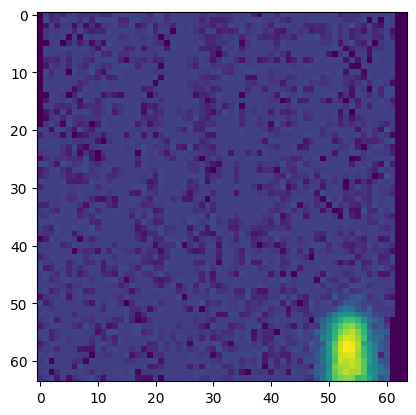

[0. 1.]


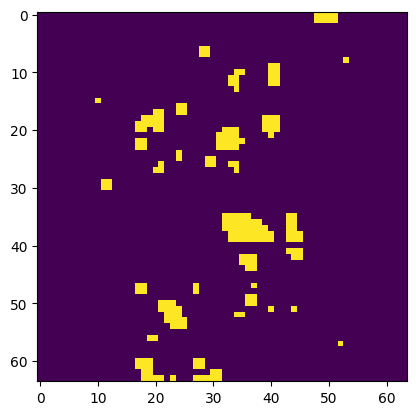

In [ ]:
import matplotlib.pyplot as plt

selected_batch = 21
for batch_num, (video, target) in enumerate(train_dataloader):
  if (batch_num == selected_batch):
    print(f"layer {train_indexes[batch_num]}")
    plt.imshow(video[0][0][0])
    plt.show()
    plt.imshow(target[0][0])
    print(np.unique(target[0][0]))
    plt.show()